In [529]:
import pandas as pd
import seaborn as sns

NUM_PARAMS = 4
WIN_PERC_PRECISION = 9

In [530]:
# file = input("which file?: ")
file = "Data/optimization (3).csv"
matches = pd.read_csv(file)

decisive_matches = matches.query("cros1 != cros2")
tied_matches = matches.query("cros1 == cros2")

In [531]:
# count the wins and losses
league = decisive_matches.groupby(list(matches.columns[:NUM_PARAMS])).size().reset_index(name='wins')
league["losses"] = decisive_matches.groupby(list(matches.columns[NUM_PARAMS:NUM_PARAMS*2])).size().reset_index(name='losses')["losses"]

# count the ties
league["ties"] = 0
tied_league = tied_matches.groupby(list(matches.columns[:NUM_PARAMS])).size().reset_index(name='ties')
for i in range(len(tied_league)):
    league.loc[pd.DataFrame(league[list(league.columns[:NUM_PARAMS])]==list(tied_league.loc[i][:NUM_PARAMS])).all(axis=1), "ties"] = tied_league["ties"][i]

# compute the win percentage and rank the players by it
league["matches"] = league["losses"] + league["wins"] + league["ties"]
league["win_perc"] = round(league["wins"] / league["matches"] * 100, WIN_PERC_PRECISION)
league = league.sort_values("win_perc",ascending=False).reset_index(drop=True)

league.iloc[:5,:]

,stra,perc,circ,samp,wins,losses,ties,matches,win_perc
0,Mirroring,0.0,0.425,35,18,8,0,26,69.230769
1,Mirroring,0.0,0.425,40,2,1,0,3,66.666667
2,Mirroring,0.0,0.400,40,17,9,1,27,62.962963
3,Mirroring,0.0,0.400,35,16,10,0,26,61.538462
4,Annealing,0.9,0.425,20,16,10,0,26,61.538462


<Axes: >

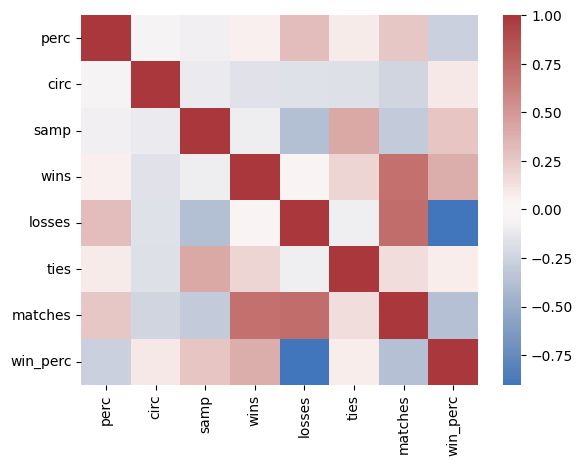

In [532]:
sns.heatmap(league.corr(numeric_only=True), cmap="vlag", center=0.0)

In [533]:
def show_matches_of_rank(rank,which="both"):
    wins = matches[pd.DataFrame(matches[list(matches.columns[:NUM_PARAMS])]==list(league.loc[rank][:NUM_PARAMS])).all(axis=1)].reset_index(drop=True)
    losses = matches[pd.DataFrame(matches[list(matches.columns[NUM_PARAMS:NUM_PARAMS*2])]==list(league.loc[rank][:NUM_PARAMS])).all(axis=1)].reset_index(drop=True)
    both = pd.concat([wins,losses]).reset_index(drop=True)
    return wins if which == "wins" else losses if which == "losses" else both

In [534]:
RANK = 1
show_matches_of_rank(RANK)

,stra,perc,circ,samp,stra2,perc2,circ2,samp2,cros1,cros2
0,Mirroring,0.0,0.425,40,Annealing,0.95,0.400,20,4616,4029
1,Mirroring,0.0,0.425,40,Mirroring,0.00,0.400,20,152,126
2,Annealing,0.9,0.400,20,Mirroring,0.00,0.425,40,63864,58061
